# Numerical simulation for `Double-bracket quantum algorithms for quantum imaginary-time evolution`

### View paper at

https://arxiv.org/abs/2412.04554



## Contents

1. [Initialization](#1.-Initialization)<br>
     1.1 [Define the input Hamiltonian](#1.1-Define-the-input-Hamiltonian)    
     1.2 [Load data of previous simulations](#1.2-Load-data-of-previous-simulations)<br>

2. [App. Fig. 4: Visualize fidelity $F_k$ of DB-QITE](#Fig.-4:-Visualize-fidelity-$F_k$-in-DB-QITE)<br>
    2.1 [Generate plots for energies and fidelities](#2.1-Generate-plots-for-energies-and-fidelities)  
    2.2 [Produce plot for $L=10$](#2.2-Produce-plot-for-$L=10$)    
    2.3 [Fig. 4: Produce grid of plots for $L=10,12,...$](#2.3-Fig.-4:-Produce-grid-of-plots-for-$L=10,12,...$)
    
3. [App. Fig. 4: Circuit gate counts of DB-QITE](#Fig.-4:-Circuit-gate-counts-of-DB-QITE)<br>

4. [Additional Fig.: Plot evolution times](#4.-Additional-Fig.:-Plot-evolution-times)<br>

5. [App. Fig. 5: Comparison DB-QITE vs QPE](#Fig.-5:-Comparison-DB-QITE-vs-QPE)<br>

6. [App. Fig. 6: Warm-start of QPE with DB-QITE](#Fig.-6:-Warm-start-of-QPE-with-DB-QITE)<br>

And finally, after all the background studies we synthesize these results into an overview figure in the main-text

7. [Main-text Fig. 3: Main-text figure](#Fig.-3:-Main-text-figure)<br>


# 1. Initialization

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter
from scipy.sparse.linalg import eigsh


from qrisp.operators import X, Y, Z
from qrisp.vqe.problems.heisenberg import *
import networkx as nx

import pickle
from time import time
from datetime import datetime

def save_data(data, filename):  
    # Open a file for writing
    with open(filename+'.pickle', 'wb') as file:
        # Write the object to the file
        pickle.dump(data, file)

def load_data(filename):
    with open(filename+'.pickle', 'rb') as file:
        # Load the object from the file
        data = pickle.load(file)
    return data

def compute_moments(psi, H):
    E = (psi.conj().T @ H.dot(psi)).real
    S = (psi.conj().T @ (H @ H).dot(psi)).real
    return E, S, S - E**2

def run_param_rc(fontsize = 30):
        import matplotlib.pyplot as plt
        plt.rcParams['axes.labelsize'] = fontsize
        plt.rcParams['axes.titlesize'] = fontsize
        plt.rcParams['font.size'] = fontsize
        #set_matplotlib_formats('pdf', 'png')
        plt.rcParams['savefig.dpi'] = 75
        plt.rcParams['lines.linewidth'] = 2.0
        plt.rcParams['lines.markersize'] = 8
        plt.rcParams['legend.fontsize'] = 12
        plt.rcParams['legend.labelspacing'] = .3
        plt.rcParams['legend.columnspacing']= .3
        plt.rcParams['legend.handletextpad']= .1
        plt.rcParams['text.usetex'] = True
        plt.rcParams['font.family'] = "serif"
        plt.rcParams['font.serif'] = "cm"

## 1.1 Define the input Hamiltonian

[top](#Contents) 

In [2]:
def create_heisenberg_hamiltonian_(G, J):
    H = sum(J*( X(i)*X(j)+Y(i)*Y(j)+Z(i)*Z(j) ) for (i,j) in G.edges())
    return H

def calculate_spectra(L):
    G = nx.Graph()
    G.add_edges_from([(k,(k+1)%L) for k in range(L-1)]) 

    J = 1
    H = create_heisenberg_hamiltonian_(G, J)

    M = H.to_sparse_matrix()
    eigenvalues, eigenvectors = eigsh(M, k=2, which='SA')
    return eigenvalues, eigenvectors

x_val=list(range(4,22,2))

spectra = dict()
for L in x_val:
    spectra[L] = calculate_spectra(L) 

E0_val = dict()
E1_val = dict()
E0_vec = dict()
E1_vec = dict()

for L in x_val:
    E0_val[L] = spectra[L][0][0]
    E1_val[L] = spectra[L][0][1]

    E0_vec[L] = spectra[L][1][:,0]
    E1_vec[L] = spectra[L][1][:,1]

data = {"E0_val" : E0_val, "E0_vec" : E0_vec, "E1_val" : E1_val, "E1_vec" : E1_vec}
#save_data(data,'data/E0_E1')


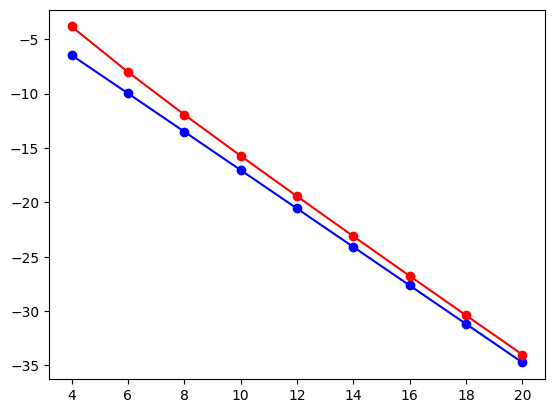

In [3]:
plt.plot(x_val, list(E0_val.values()), color='blue', marker='o', linestyle='solid')
plt.plot(x_val, list(E1_val.values()), color='red', marker='o', linestyle='solid')

## 1.2 Load data of previous simulations

[top](#Contents) 

In [ ]:
# Load data (transpilation to {CZ,U3}), 2 steps 2nd order Trotterization, Singlet + HVA
results_10 = load_data('data/benchmarks_2nd_L=10_05-21-16') 
results_12 = load_data('data/benchmarks_2nd_L=12_05-21-17')
results_14 = load_data('data/benchmarks_2nd_L=14_05-21-17')  
results_16 = load_data('data/benchmarks_2nd_L=16_05-21-18')  
results_18 = load_data('data/benchmarks_2nd_L=18_05-21-19')  
results_20 = load_data('data/benchmarks_2nd_L=20_05-21-22') 

results_QITE = dict()
results_QITE[10] = results_10
results_QITE[12] = results_12
results_QITE[14] = results_14
results_QITE[16] = results_16
results_QITE[18] = results_18
results_QITE[20] = results_20

results_QPE = dict() # spectrum in [0,1)
results_QPE[0] = load_data('data/benchmarks_QPE_Singlet_04-25-14')
results_QPE[1] = load_data('data/benchmarks_QPE_VQE_05-21-18')

results_QPE_rescaled_01 = dict() # spectrum in [0,0.1)
results_QPE_rescaled_01[0] = load_data('data/benchmarks_QPE_Singlet_rescaled_0.1_05-21-20')
results_QPE_rescaled_01[1] = load_data('data/benchmarks_QPE_VQE_L=20_rescaled_0.1_05-28-17')

results_QPE_rescaled_05 = dict() # spectrum in [0,0.5)
results_QPE_rescaled_05[0] = load_data('data/benchmarks_QPE_Singlet_rescaled_0.5_05-21-21')
results_QPE_rescaled_05[1] = load_data('data/benchmarks_QPE_VQE_L=20_rescaled_0.5_05-27-11')

# L=20
results_Singlet_QPE = load_data('data/benchmarks_QPE_Singlet_04-25-14') # spectrum in [0,1)
results_Singlet_QPE_rescaled_01 = load_data('data/benchmarks_QPE_Singlet_rescaled_0.1_05-21-20') # spectrum in [0,0.1)
results_Singlet_QPE_rescaled_05 = load_data('data/benchmarks_QPE_Singlet_rescaled_0.5_05-21-21') # spectrum in [0,0.5)

results_Singlet_QITE_QPE = load_data('data/Singlet_QITE_QPE_L=20_04-25-23') # spectrum in [0,1)
results_Singlet_QITE_QPE_rescaled_01 = load_data('data/Singlet_QITE_QPE_L=20_rescaled_0.1_05-21-22') # spectrum in [0,0.1)
results_Singlet_QITE_QPE_rescaled_05 = load_data('data/Singlet_QITE_QPE_L=20_rescaled_0.5_05-21-21') # spectrum in [0,0.5)

results_VQE_QPE = load_data('data/benchmarks_QPE_VQE_05-21-18') # spectrum in [0,1)
results_VQE_QPE_rescaled_01 = load_data('data/benchmarks_QPE_VQE_L=20_rescaled_0.1_05-28-17') # spectrum in [0,0.1)
results_VQE_QPE_rescaled_05 = load_data('data/benchmarks_QPE_VQE_L=20_rescaled_0.5_05-27-11') # spectrum in [0,0.5)

results_VQE_QITE_QPE = load_data('data/VQE_QITE_QPE_L=20_05-21-18')
results_VQE_QITE_QPE_rescaled_05 = load_data('data/VQE_QITE_QPE_L=20_rescaled_0.5_06-03-22') # spectrum in [0,0.5)


# Fig. 4: Visualize fidelity $F_k$ in DB-QITE

[top](#Contents) 

In [5]:
L=18
psi = E0_vec[L] # ground state
states = results_QITE[L][1]["statevectors"] # 0 Singlet, 1 VQE
fidelities = []
for phi in states:
    fidelities.append(np.abs(np.dot(psi.conj().transpose(),phi))**2)

fidelities

[np.float64(0.7904931737748703),
 np.float64(0.8893946585218012),
 np.float64(0.9379960388754458),
 np.float64(0.9571909161625323),
 np.float64(0.9681973035495656),
 np.float64(0.9768041199195919)]

### 2.1 Generate plots for energies and fidelities

[top](#Contents) 

In [6]:
def generate_plots(ax1, L):
    
    lables_energies=[r"$E_k\ |$Singlet$\rangle$",r"$E_k\ |$HVA$\rangle$"]
    lables_fidelities=[r"$F_k\ |$Singlet$\rangle$",r"$F_k\ |$HVA$\rangle$"]
    alphas = [1.0, 0.6]
    markers = ['d','o']
    indices = [0,1] 
    steps = [0,1,2,3,4,5]

    results = results_QITE[L]

    ###############################################################################
    # SUBPLOT 1: Energy
    ###############################################################################

    # 1) Plot energies on the left y-axis
    for i,ind in enumerate(indices):
        #line1, = ax1.plot(results[ind]['evolution_times'], results[ind]['optimal_energies'], label=lables_energies[ind], color='blue', marker=markers[i], linestyle='solid', linewidth=2, zorder=3, alpha=alphas[i])
        line1, = ax1.plot(steps, results[ind]['optimal_energies'], label=lables_energies[ind], color='blue', marker=markers[i], linestyle='solid', linewidth=2, zorder=3, alpha=alphas[i])

    ax1.axhline(y=E0_val[L], color="red", linestyle=':', alpha=1.0)
    #ax1.axhline(y=E0_val[L]+0.1, color="orange", linestyle=':', alpha=0.8)
    ax1.axhline(y=E1_val[L], color="red", linestyle=':', alpha=0.6)

    ax1.text(
        0.2,           
        E0_val[L]+0.15,       
        r"$\lambda_0$",                          
        va="center",
        ha="left",
        color="red",
    )   

    ax1.text(
        0.2,           
        E1_val[L]+0.15,             
        r"$\lambda_1$",                           
        va="center",
        ha="left",
        color="red",
        alpha = 0.6
    )

    ax1.set_xlabel(r"Steps $k$")
    ax1.set_ylabel(r"Energy $E_k$")
    ax1.set_xticks(ticks = range(0, 6, 1))
    ax1.legend(loc="center right", fontsize=12)
    ax1.set_title(f"DB-QITE for $L={L}$")

    ###############################################################################
    # SUBPLOT 2: Fidelity
    ###############################################################################

    # 2) Create a twin axis for fluctuations
    axF = ax1.twinx()

    fidelities = dict()
    for ind in indices:
        # Calculate fidelities
        psi = E0_vec[L] # ground state
        states = results[ind]["statevectors"]
        fidelities_ = []
        for phi in states:
            fidelities_.append(np.abs(np.dot(psi.conj().transpose(),phi))**2)
        fidelities[ind] = fidelities_

    # 1) Plot energies on the left y-axis
    for i,ind in enumerate(indices):
        #line1, = axF.plot(results[ind]['evolution_times'], fidelities[ind], label=lables_fidelities[ind], color='green', marker=markers[i], linestyle='solid', linewidth=2, zorder=3, alpha=alphas[i])
        line1, = axF.plot(steps, fidelities[ind], label=lables_fidelities[ind], color='green', marker=markers[i], linestyle='solid', linewidth=2, zorder=3, alpha=alphas[i])

    axF.axhline(y=1, color="orange", linestyle=':', alpha=1.0)
    axF.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8)
    axF.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6)

    axF.set_ylabel(r"Fidelity $F_k$")

    ###############################################################################

    # 3) Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = axF.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="center right", ncol=1, fontsize=12)


### 2.2 Produce plot for $L=10$

[top](#Contents) 

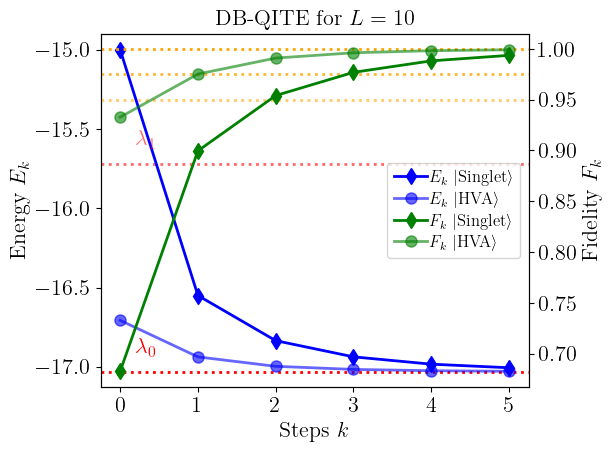

In [7]:
run_param_rc(16)

fig, ax1 = plt.subplots()
generate_plots(ax1,10)
plt.tight_layout()
plt.show()

### 2.3 Fig. 4: Produce grid of plots for $L=10,12,...$

[top](#Contents) 

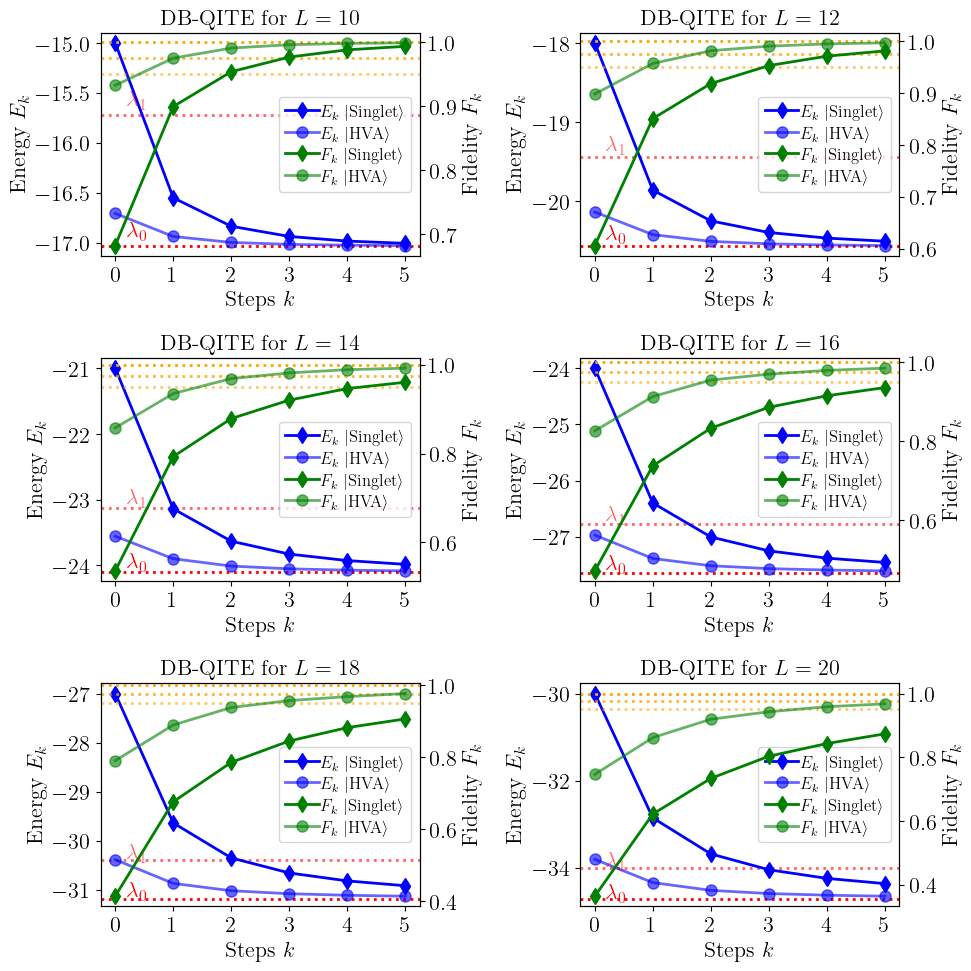

In [8]:
run_param_rc(16)

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, ((ax_10, ax_12), 
      (ax_14, ax_16), 
      (ax_18, ax_20)) = plt.subplots(3, 2, figsize=(10, 10), 
                                     gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1,1,1]})

generate_plots(ax_10,10)
generate_plots(ax_12,12)
generate_plots(ax_14,14)
generate_plots(ax_16,16)
generate_plots(ax_18,18)
generate_plots(ax_20,20)

plt.tight_layout()
plt.savefig("plots/QITE_Heisenberg.pdf")
plt.show()

# Fig. 4: Circuit gate counts of DB-QITE

[top](#Contents)

In [24]:
def generate_circuit_plots_QITE(axC, L, type='VQE'):

    ###############################################################################
    # SUBPLOT 3: Circuit data 
    ###############################################################################
    results = results_QITE[L]

    steps = [0,1,2,3,4,5]

    # Singlet
    u_count_S = np.array([results[0]["circuit_data"][0][k]['u3'] for k in steps])
    cz_count_S = np.array([results[0]["circuit_data"][0][k]['cz'] for k in steps])
    depth_S = np.array([results[0]["circuit_data"][2][k] for k in steps])

    # VQE
    u_count_V = np.array([results[1]["circuit_data"][0][k]['u3'] for k in steps])
    cz_count_V = np.array([results[1]["circuit_data"][0][k]['cz'] for k in steps])
    depth_V = np.array([results[1]["circuit_data"][2][k] for k in steps])

    scaling = 1000

    if type=='Singlet':
        axC.plot(steps, u_count_S/scaling, marker='d', color='#1f77b4', alpha=1.0, label='U3 count')
        axC.plot(steps, cz_count_S/scaling, marker='o', color='#ff7f0e', alpha=1.0, label='CZ count')
        axC.plot(steps, depth_S/scaling, marker='s', color='#2ca02c', alpha=1.0, label='Depth')

        axC.plot(steps, u_count_V/scaling, color='#1f77b4', marker='d', alpha=0.6, linestyle='dashed') 
        axC.plot(steps, cz_count_V/scaling, color='#ff7f0e', marker='o', alpha=0.6, linestyle='dashed') 
        axC.plot(steps, depth_V/scaling, color='#2ca02c', marker='s', alpha=0.6, linestyle='dashed')    
    else:
        axC.plot(steps, u_count_V/scaling, marker='d', color='#1f77b4', alpha=1.0, label='U3 count')
        axC.plot(steps, cz_count_V/scaling, marker='o', color='#ff7f0e', alpha=1.0, label='CZ count')
        axC.plot(steps, depth_V/scaling, marker='s', color='#2ca02c', alpha=1.0, label='Depth')

        axC.plot(steps, u_count_S/scaling, color='#1f77b4', marker='d', alpha=0.6, linestyle='dashed') 
        axC.plot(steps, cz_count_S/scaling, color='#ff7f0e', marker='o', alpha=0.6, linestyle='dashed') 
        axC.plot(steps, depth_S/scaling, color='#2ca02c', marker='s', alpha=0.6, linestyle='dashed')        

    axC.set_xlabel(r"Steps $k$")
    axC.set_ylabel("Counts in thousands")
    axC.set_xticks(ticks = range(0, 6, 1))

    axC.legend(loc="upper left", ncols=3, fontsize=15)
    axC.set_title(f"DB-QITE for $L={L}$")

    ###############################################################################
    # Inset table: circuit data GC
    ###############################################################################

    psi = E0_vec[L] # ground state
    if type=='Singlet':
        states = results[0]["statevectors"] # 0 Singlet, 1 VQE
    else:
        states = results[1]["statevectors"] # 0 Singlet, 1 VQE
    fidelities = []
    for phi in states:
        fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

    # Data for the table
    rows = [' 0 ', '1', '2', '3', '4', '5']
    columns = (r'$k$','U3', 'CZ', 'Depth', r'$|\langle \Psi_k | \lambda_0 \rangle |^2$')
    if type=='Singlet':
        cell_text = [[rows[i], u_count_S[i], cz_count_S[i], depth_S[i], fidelities[i]] for i in range(6)]
    else:
        cell_text = [[rows[i], u_count_V[i], cz_count_V[i], depth_V[i], fidelities[i]] for i in range(6)]

    # Adjust column widths
    col_widths = [0.05, 0.1, 0.1, 0.1, 0.1]  # First column is wider

    # Add a table at the bottom of the axes
    tableC = axC.table(cellText=cell_text,
                        colLabels=columns,
                        loc='center left',
                        colWidths=col_widths)
    tableC.auto_set_font_size(False)
    tableC.set_fontsize(12)
    tableC.scale(1.5, 1.5)  # Adjust the scaling as needed


def generate_circuit_plots_QPE(axC, L, type='VQE'):

    ###############################################################################
    # SUBPLOT 3: Circuit data 
    ###############################################################################
    results_S = results_QPE[0][L]
    results_V = results_QPE[1][L]

    steps = [1,2,3,4,5] # Number of precision qubits for QPE

    # Singlet
    u_count_S = np.array([results_S[k]["ops"]["u3"] for k in steps])
    cz_count_S = np.array([results_S[k]["ops"]['cz'] for k in steps])
    depth_S = np.array([results_S[k]["depth"] for k in steps])

    # VQE
    u_count_V = np.array([results_V[k]["ops"]["u3"] for k in steps])
    cz_count_V = np.array([results_V[k]["ops"]['cz'] for k in steps])
    depth_V = np.array([results_V[k]["depth"] for k in steps])

    scaling = 1000

    if type=='Singlet':
        axC.plot(steps, u_count_S/scaling, marker='d', color='#1f77b4', alpha=1.0, label='U3 count')
        axC.plot(steps, cz_count_S/scaling, marker='o', color='#ff7f0e', alpha=1.0, label='CZ count')
        axC.plot(steps, depth_S/scaling, marker='s', color='#2ca02c', alpha=1.0, label='Depth')

        #axC.plot(steps, u_count_V/scaling, color='#1f77b4', marker='d', alpha=0.6, linestyle='dashed') 
        #axC.plot(steps, cz_count_V/scaling, color='#ff7f0e', marker='o', alpha=0.6, linestyle='dashed') 
        #axC.plot(steps, depth_V/scaling, color='#2ca02c', marker='s', alpha=0.6, linestyle='dashed')    
    else:
        axC.plot(steps, u_count_V/scaling, marker='d', color='#1f77b4', alpha=1.0, label='U3 count')
        axC.plot(steps, cz_count_V/scaling, marker='o', color='#ff7f0e', alpha=1.0, label='CZ count')
        axC.plot(steps, depth_V/scaling, marker='s', color='#2ca02c', alpha=1.0, label='Depth')

        #axC.plot(steps, u_count_S/scaling, color='#1f77b4', marker='d', alpha=0.6, linestyle='dashed') 
        #axC.plot(steps, cz_count_S/scaling, color='#ff7f0e', marker='o', alpha=0.6, linestyle='dashed') 
        #axC.plot(steps, depth_S/scaling, color='#2ca02c', marker='s', alpha=0.6, linestyle='dashed')        

    axC.set_xlabel(r"Precision $k$")
    axC.set_ylabel("Counts in thousands")
    axC.set_xticks(ticks = range(0, 6, 1))

    axC.legend(loc="upper left", ncols=3, fontsize=15)
    axC.set_title(f"QPE for $L={L}$")

    ###############################################################################
    # Inset table: circuit data GC
    ###############################################################################

    if type=='Singlet':
        fidelities = [np.round(results_S[k]["F0"],3) for k in steps]
    else:
        fidelities = [np.round(results_V[k]["F0"],3) for k in steps]

    # Data for the table
    rows = ['1', '2', '3', '4', '5']
    columns = (r'$k$','U3', 'CZ', 'Depth', r'$|\langle \Psi_k | \lambda_0 \rangle |^2$')
    if type=='Singlet':
        cell_text = [[rows[i], u_count_S[i], cz_count_S[i], depth_S[i], fidelities[i]] for i in range(5)]
    else:
        cell_text = [[rows[i], u_count_V[i], cz_count_V[i], depth_V[i], fidelities[i]] for i in range(5)]

    # Adjust column widths
    col_widths = [0.05, 0.1, 0.1, 0.1, 0.1]  # First column is wider

    # Add a table at the bottom of the axes
    tableC = axC.table(cellText=cell_text,
                        colLabels=columns,
                        loc='center left',
                        colWidths=col_widths)
    tableC.auto_set_font_size(False)
    tableC.set_fontsize(12)
    tableC.scale(1.5, 1.5)  # Adjust the scaling as needed



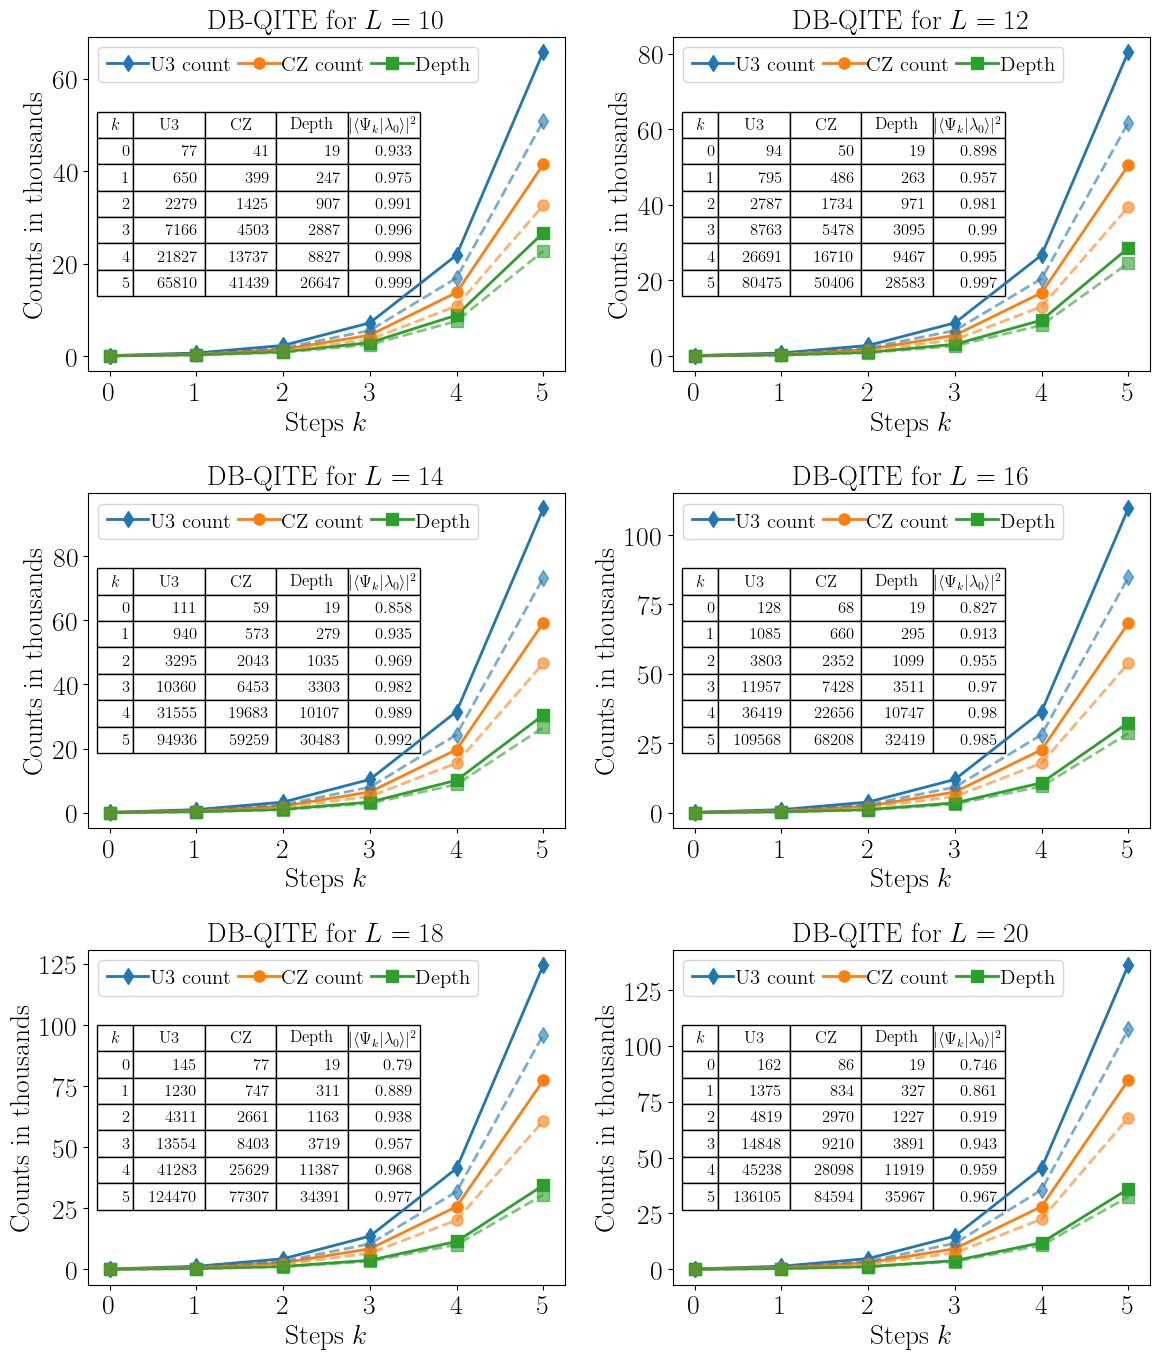

In [25]:
run_param_rc(20)

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, ((ax_10, ax_12), (ax_14, ax_16), (ax_18, ax_20)) = plt.subplots(3, 2, 
                                             figsize=(12, 14), 
                                             #figsize=(10, 10), 
                                             gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1,1,1]})

type = "VQE"
generate_circuit_plots_QITE(ax_10,10, type=type)
generate_circuit_plots_QITE(ax_12,12, type=type)
generate_circuit_plots_QITE(ax_14,14, type=type)
generate_circuit_plots_QITE(ax_16,16, type=type)
generate_circuit_plots_QITE(ax_18,18, type=type)
generate_circuit_plots_QITE(ax_20,20, type=type)

plt.tight_layout()
#plt.savefig("plots/QITE_Heisenberg_circuits.pdf")
plt.show()

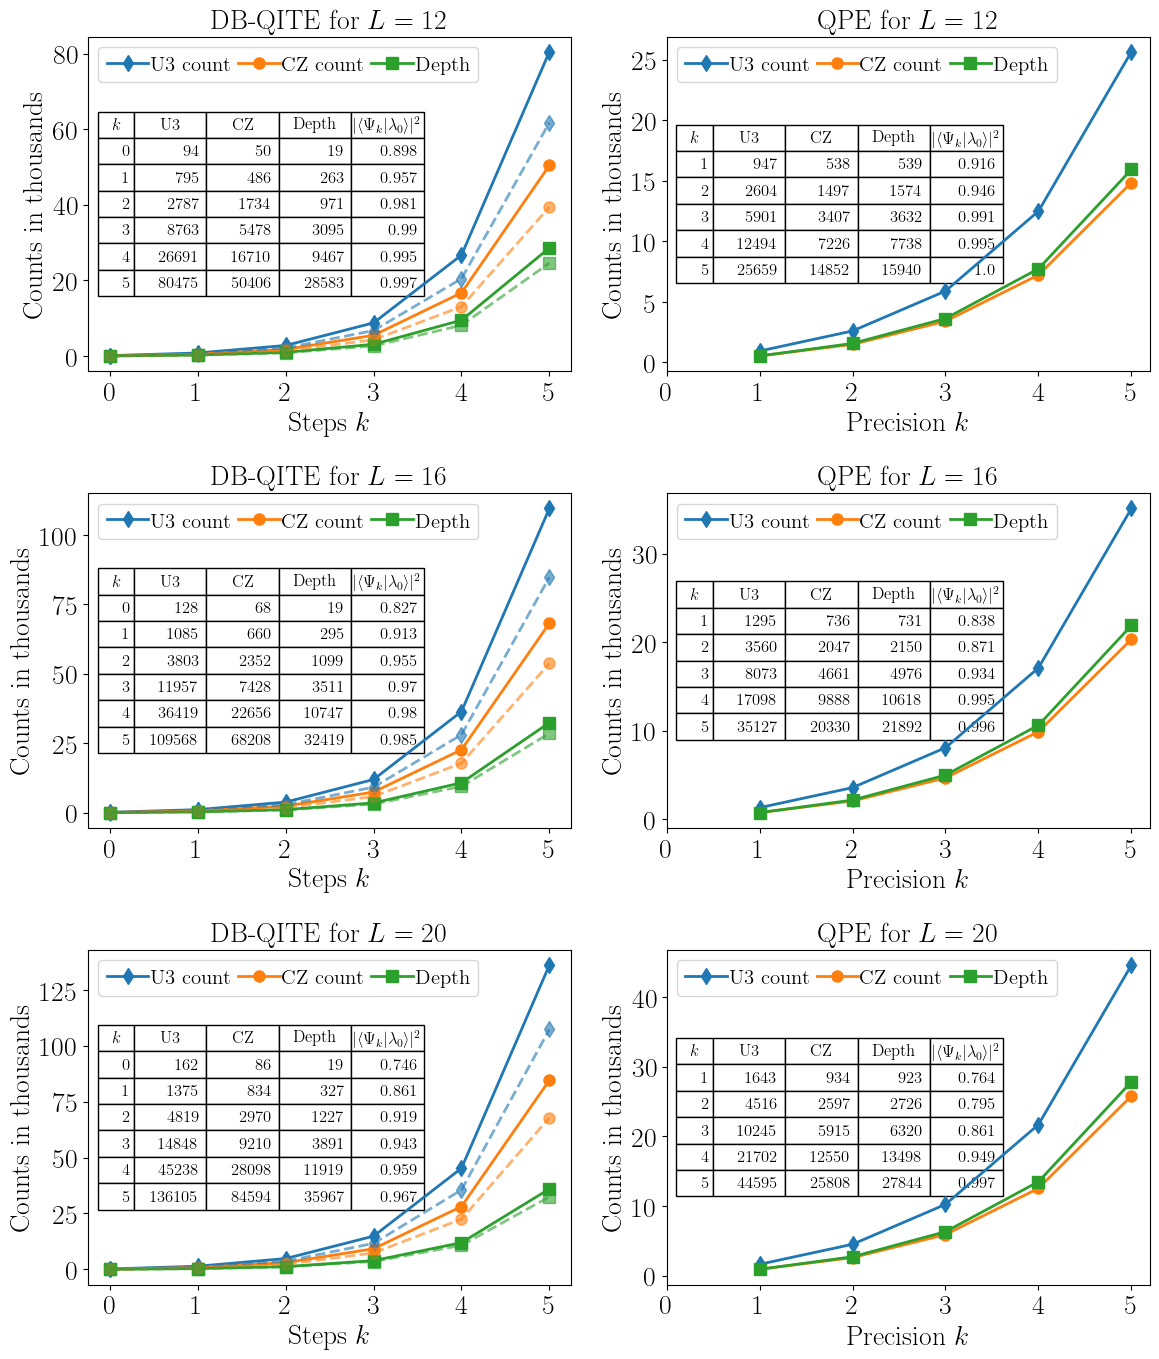

In [26]:
run_param_rc(20)

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, ((ax_10, ax_12), (ax_14, ax_16), (ax_18, ax_20)) = plt.subplots(3, 2, 
                                             figsize=(12, 14), 
                                             #figsize=(10, 10), 
                                             gridspec_kw={"width_ratios": [1, 1], "height_ratios": [1,1,1]})

type = "VQE"
generate_circuit_plots_QITE(ax_10,12, type=type)
generate_circuit_plots_QPE(ax_12,12, type=type)
generate_circuit_plots_QITE(ax_14,16, type=type)
generate_circuit_plots_QPE(ax_16,16, type=type)
generate_circuit_plots_QITE(ax_18,20, type=type)
generate_circuit_plots_QPE(ax_20,20, type=type)

plt.tight_layout()
#plt.savefig("plots/QITE_QPE_Heisenberg_circuits.pdf")
plt.show()

# 4. Additional Fig.: Plot evolution times

[top](#Contents)

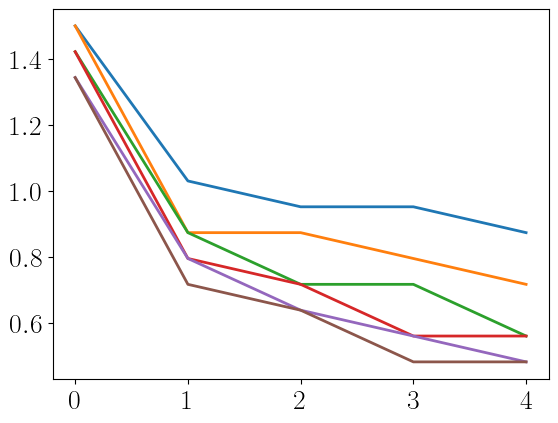

In [11]:
for L in range(10,22,2):
    times = results_QITE[L][0]["evolution_times"]
    s = [times[k+1]-times[k] for k in range(len(times)-1)]
    plt.plot(s)

plt.show()

Effectively the DB-QITE step durations are quite large:

In [12]:
s

[np.float64(1.343157894736842),
 np.float64(0.7157894736842105),
 np.float64(0.6373684210526314),
 np.float64(0.4805263157894739),
 np.float64(0.4805263157894739)]

Those were much larger than the step size $s=\Delta/(12 \|H\|^3)$ taken in the analytical theorem 2:

In [13]:
s = np.abs((E0_val[L]-E1_val[L])/12/np.linalg.norm(spectra[L][-1])**3)
s

np.float64(0.02122435643665247)

which means that the analytical estimate of the fidelity gain $q$ is relatively small compared to the fidelity gains after optimizing the step duration

In [14]:
L=10

psi = E0_vec[L] # ground state
phi = results_QITE[L][1]["statevectors"][0] # 0 Singlet, 1 VQE
F0 = np.abs(np.dot(psi.conj().transpose(),phi))**2


q = 1-s*F0*(E1_val[L]-E0_val[L])
q

np.float64(0.9740757488213959)

and such q in $k\approx 5$ steps would not lead to a very small infidelity

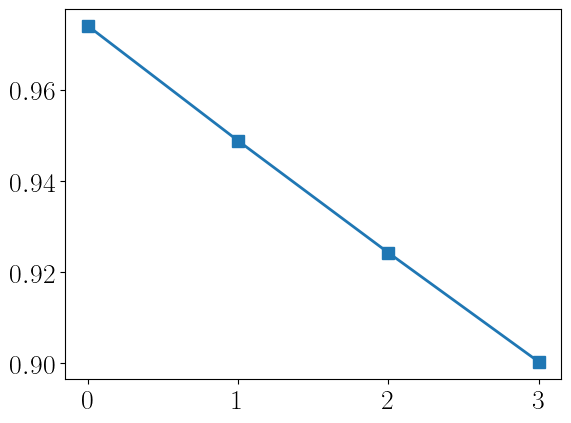

In [15]:
plt.plot([q**k for k in range(1,5)], '-s')

# Fig. 5: Comparison DB-QITE vs QPE

[top](#Contents)

In [102]:
markers = ['d', '^', 'v', '<', '>', 'o']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
alphas = [0.25,0.4,0.55,0.7,0.85,1]

def generate_fidelity_cz_qite(ax, init_type, show_legend=True):

    if init_type=="Singlet":
        index = 0
        ax.set_title(r"DB-QITE for $|$Singlet$\rangle$")
    if init_type=="VQE":
        index = 1
        ax.set_title(r"DB-QITE for $|$HVA$\rangle$")

    steps = list(range(0,6))

    cz_data_qite = dict()
    for i,L in enumerate(list(range(10,22,2))):
        results = results_QITE[L]
        cz = np.array([results[index]["circuit_data"][0][k]['cz'] for k in steps])
        cz_data_qite[L] = cz

    for i,L in enumerate(list(range(10,22,2))):
        results = results_QITE[L]

        psi = E0_vec[L] # ground state
        states = results[index]["statevectors"]
        fidelities = []
        for phi in states:
            fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

        cz_counts = cz_data_qite[L]

        ax.plot(cz_counts, fidelities, marker=markers[i], label=r'$L=$'+str(L), color= colors[0], alpha = alphas[i])


    ax.axhline(y=1, color="orange", linestyle=':', alpha=1.0)
    ax.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8)
    ax.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6)

    if show_legend:
        ax.legend(loc="best", ncols=2, fontsize=15)
    #ax.set_xticks(ticks = range(0, 6, 1))
    ax.set_xscale('log')
    ax.set_xlabel(r"Number of CZ gates")
    ax.set_ylabel(r"Fidelity $F_k$")


def generate_fidelity_cz_qpe(ax, init_type, show_legend=True):

    if init_type=="Singlet":
        index = 0
        ax.set_title(r"QPE for $|$Singlet$\rangle$")
    if init_type=="VQE":
        index = 1
        ax.set_title(r"QPE for $|$HVA$\rangle$")

    steps = list(range(1,6))

    cz_data_qpe = dict()
    for i,L in enumerate(list(range(10,22,2))):
        cz = [results_QPE[index][L][k]['ops']['cz'] for k in steps]
        cz_data_qpe[L] = cz

    for i,L in enumerate(list(range(10,22,2))):
        fidelities = [results_QPE[index][L][k]['F0'] for k in steps]
        cz_counts = cz_data_qpe[L]

        if L==20:
            ax.plot(cz_counts, fidelities, marker=markers[i], color= colors[1], alpha = alphas[i], label=f'QPE $[0,1)$')
        else:
            ax.plot(cz_counts, fidelities, marker=markers[i], color= colors[1], alpha = alphas[i])


    if init_type=="VQE":
        steps = list(range(1,8))

    fidelities = [results_QPE_rescaled_05[index][20][k]['F0'] for k in steps]
    cz_counts = [results_QPE_rescaled_05[index][20][k]['ops']['cz'] for k in steps]
    ax.plot(cz_counts, fidelities, color=colors[1], marker='o', markerfacecolor='none', linestyle='--', label=f'QPE $[0,0.5)$')

    
    fidelities = [results_QPE_rescaled_01[index][20][k]['F0'] for k in steps]
    cz_counts = [results_QPE_rescaled_01[index][20][k]['ops']['cz'] for k in steps]
    ax.plot(cz_counts, fidelities, color=colors[1], marker='o', markerfacecolor='none', linestyle='-.', label=f'QPE $[0,0.1)$')
    
    
    ax.axhline(y=1, color="orange", linestyle=':', alpha=1.0)
    ax.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8)
    ax.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6)

    if show_legend:
        ax.legend(loc="center right", fontsize=15)
    ax.set_xscale('log')
    #ax.set_xticks(ticks = range(1, 6, 1))
    ax.set_xlabel(r"Number of CZ gates")   
    ax.set_ylabel(r"Fidelity $F_k$")
    

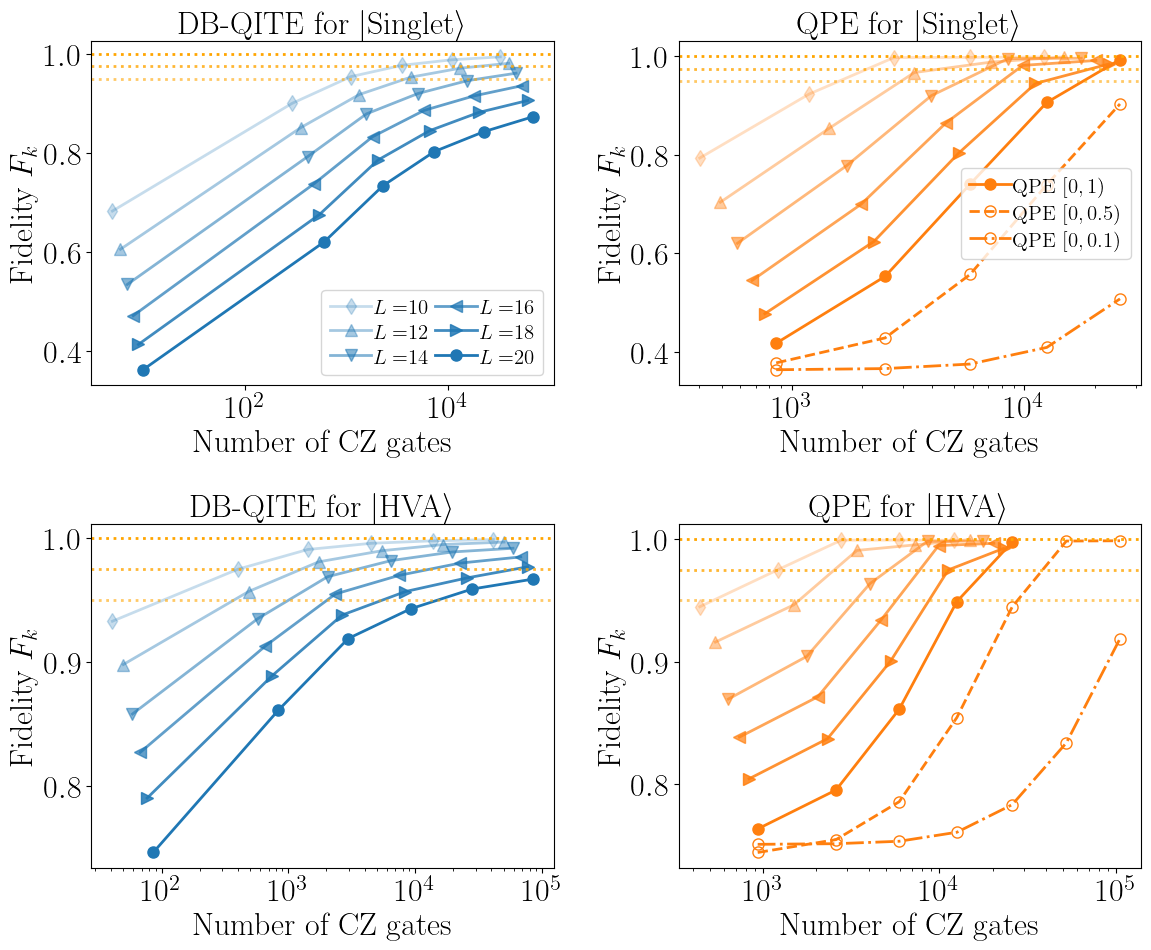

In [ ]:
run_param_rc(23)

fig, ((axS_QITE, axS_QPE), (axV_QITE, axV_QPE)) = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={"width_ratios": [1,1]})

generate_fidelity_cz_qite(axS_QITE, "Singlet")
generate_fidelity_cz_qite(axV_QITE, "VQE", show_legend=False)
generate_fidelity_cz_qpe(axS_QPE, "Singlet")
generate_fidelity_cz_qpe(axV_QPE, "VQE", show_legend=False)

plt.tight_layout()
#plt.savefig("plots/QITE_QPE_Heisenberg.pdf")
plt.show()

# Fig. 6: Warm-start of QPE with DB-QITE

[top](#Contents)

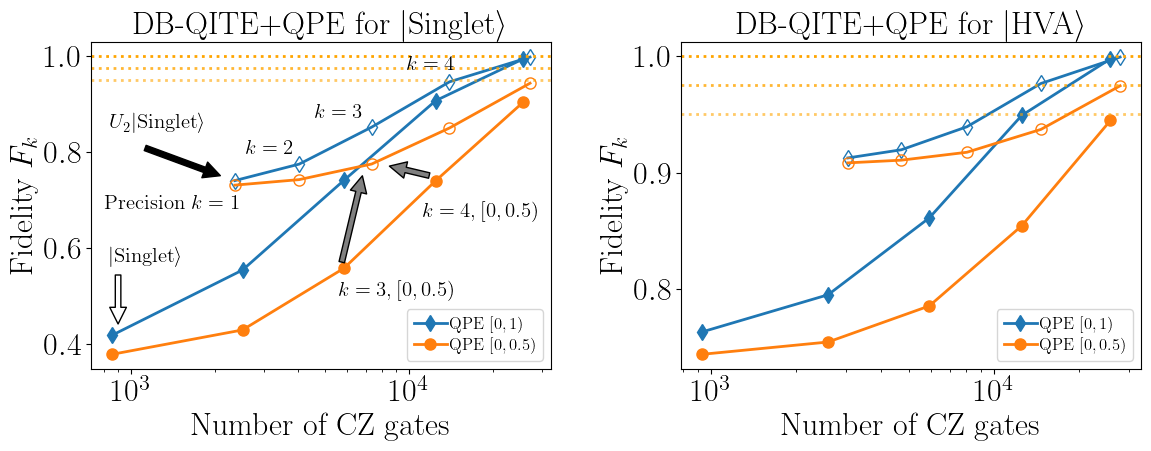

In [ ]:
run_param_rc(23)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

steps = list(range(1,6))

fig, ((axF, axF2)) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={"width_ratios": [1,1]})

###############################################################################
# SUBPLOT 1: Fidelity Singlet
###############################################################################

fidelities = [results_Singlet_QPE[20][k]['F0'] for k in steps]
cz = [results_Singlet_QPE[20][k]['ops']['cz'] for k in steps]
axF.plot(cz, fidelities, marker='d', color=colors[0], label=f'QPE $[0,1)$')

fidelities = [results_Singlet_QITE_QPE[k]['F0'] for k in steps]
cz = [results_Singlet_QITE_QPE[k]['ops']['cz'] for k in steps]
axF.plot(cz, fidelities, marker='d', markerfacecolor='none', color=colors[0])

fidelities = [results_Singlet_QPE_rescaled_05[20][k]['F0'] for k in steps]
cz = [results_Singlet_QPE_rescaled_05[20][k]['ops']['cz'] for k in steps]
axF.plot(cz, fidelities, marker='o', color=colors[1], label=f'QPE $[0,0.5)$')

fidelities = [results_Singlet_QITE_QPE_rescaled_05[k]['F0'] for k in steps]
cz = [results_Singlet_QITE_QPE_rescaled_05[k]['ops']['cz'] for k in steps]
axF.plot(cz, fidelities, marker='o', markerfacecolor='none', color=colors[1])


axF.annotate(r'$|\mathrm{Singlet}\rangle$', xy=(840,0.57), textcoords='data', fontsize=15)

axF.annotate(r'$U_2|\mathrm{Singlet}\rangle$', xy=(840,0.85), textcoords='data', fontsize=15)

axF.annotate(' ',
            xy=(900, 0.44),  # theta, radius
            xytext=(900, 0.55),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='white', shrink=0.01),
            horizontalalignment='left',
            verticalalignment='bottom')
axF.annotate(' ',
            xy=(2100, 0.75),  # theta, radius
            xytext=(1100, 0.81),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')


axF.annotate(' ',
            xy=(6800, 0.75),  # theta, radius
            xytext=(5700, 0.505),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='gray', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')

 
axF.annotate(' ',
            xy=(8500, 0.77),  # theta, radius
            xytext=(12100, 0.69),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='gray', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')



axF.annotate(r'Precision $k=1$', xy=(800,0.68), textcoords='data', fontsize=15)
axF.annotate(r'$k=2$', xy=(2600,0.795), textcoords='data', fontsize=15)
axF.annotate(r'$k=3$', xy=(4.6e3,0.87), textcoords='data', fontsize=15)
axF.annotate(r'$k=4$', xy=(9800,0.97), textcoords='data', fontsize=15)

axF.annotate(r'$k=3, [0,0.5)$', xy=(5600,0.5), textcoords='data', fontsize=15)
axF.annotate(r'$k=4, [0,0.5)$', xy=(11200,0.665), textcoords='data', fontsize=15)

axF.axhline(y=1, color="orange", linestyle=':', alpha=1.0)
axF.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8)
axF.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6)

axF.legend(loc="best", fontsize=12)
axF.set_xscale('log')
axF.set_xlabel(r"Number of CZ gates")
axF.set_ylabel(r"Fidelity $F_k$")
axF.set_title(r"DB-QITE+QPE for $|$Singlet$\rangle$")

###############################################################################
# SUBPLOT 1: Fidelity HVA
###############################################################################

fidelities = [results_VQE_QPE[20][k]['F0'] for k in steps]
cz = [results_VQE_QPE[20][k]['ops']['cz'] for k in steps]
axF2.plot(cz, fidelities, marker='d', color=colors[0], label=f'QPE $[0,1)$')

fidelities = [results_VQE_QITE_QPE[k]['F0'] for k in steps]
cz = [results_VQE_QITE_QPE[k]['ops']['cz'] for k in steps]
axF2.plot(cz, fidelities, marker='d', markerfacecolor='none', color=colors[0])

fidelities = [results_VQE_QPE_rescaled_05[20][k]['F0'] for k in steps]
cz = [results_VQE_QPE_rescaled_05[20][k]['ops']['cz'] for k in steps]
axF2.plot(cz, fidelities, marker='o', color=colors[1], label=f'QPE $[0,0.5)$')

fidelities = [results_VQE_QITE_QPE_rescaled_05[k]['F0'] for k in steps]
cz = [results_VQE_QITE_QPE_rescaled_05[k]['ops']['cz'] for k in steps]
axF2.plot(cz, fidelities, marker='o', markerfacecolor='none', color=colors[1])

axF2.axhline(y=1, color="orange", linestyle=':', alpha=1.0)
axF2.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8)
axF2.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6)

axF2.legend(loc="best", fontsize=12)
axF2.set_xscale('log')
axF2.set_xlabel(r"Number of CZ gates")
axF2.set_ylabel(r"Fidelity $F_k$")
axF2.set_title(r"DB-QITE+QPE for $|$HVA$\rangle$")

plt.tight_layout()
#plt.savefig("plots/QITE_QPE_L=20.pdf")
plt.show()

# Fig. 3: Main-text figure

[top](#Contents)

In [33]:
def generate_plot_E_DBQITE(ax1, L):
    
    lables_energies=[r"~$~\ |\omega_0\rangle =|$Singlet$\rangle = 2^{-L/4}(|01\rangle-|10\rangle)^{\otimes L/2}$",
                     r"~$~\ |\omega_0\rangle =|$HVA$\rangle = U_\mathrm{HVA}|\mathrm{Singlet}\rangle$"]
    lables_fidelities=[r"$F_k\ |$Singlet$\rangle$",r"$F_k\ |$HVA$\rangle$"]
    alphas = [1.0, 0.6]
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    markers = ['o', 's', '^', 'v', '<', '>', 'd']
    indices = [0,1] 
    steps = [0,1,2,3,4,5]

    results = results_QITE[L]

    ###############################################################################
    # SUBPLOT 1: Energy
    ###############################################################################

    # 1) Plot energies on the left y-axis
    #for i,ind in enumerate(indices):
        #line1, = ax1.plot(results[ind]['evolution_times'], results[ind]['optimal_energies'], label=lables_energies[ind], color='blue', marker=markers[i], linestyle='solid', linewidth=2, zorder=3, alpha=alphas[i])
    ind = indices[ 0]
    line1, = ax1.plot(steps, results[ind]['optimal_energies'], label=lables_energies[ind], 
                      color=colors[0], marker='v', linestyle='solid', linewidth=2, zorder=3, alpha = 0.6)
    ind = indices[1]
    line1, = ax1.plot(steps, results[ind]['optimal_energies'], label=lables_energies[ind],
                      color=colors[0], marker=markers[2], linestyle='solid', linewidth=2, zorder=3)

    ax1.axhline(y=E0_val[L], color="red", linestyle=':', alpha=1.0)
    #ax1.axhline(y=E0_val[L]+0.1, color="orange", linestyle=':', alpha=0.8)
    ax1.axhline(y=E1_val[L], color="red", linestyle=':', alpha=0.6)


    
    ax1.set_xlabel(r"Steps $k$")
    ax1.set_ylabel(r"Energy $E_k$")
    ax1.set_xticks(ticks = range(0, 6, 1))
    ax1.set_yticks(ticks = [-30,-31,-32,-33, -34,-35])
    ax1.legend(loc="center right", fontsize=15)
    ax1.set_title(f"DB-QITE for $L={L}$")

   

    ###############################################################################

    # 3) Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
   
    ax1.legend(lines_1 , labels_1 , loc="best", ncol=1, fontsize=17)

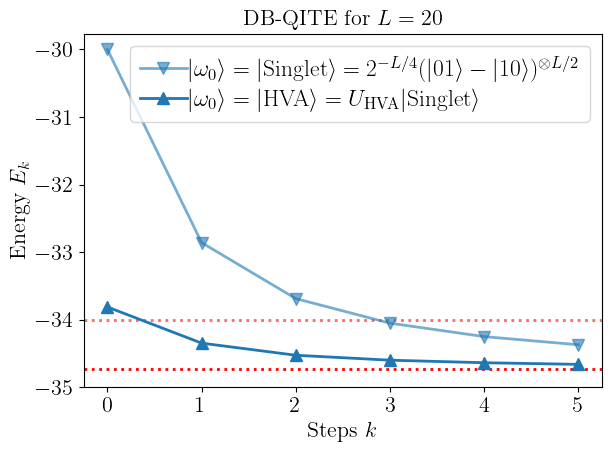

In [34]:
run_param_rc(16)

fig2, ax12 = plt.subplots()
generate_plot_E_DBQITE(ax12,20)
plt.tight_layout()
plt.show()

/var/folders/1z/61mvq94131s6zhfjfhwzpfwr0000gn/T/ipykernel_16619/1230448715.py:94: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best", ncols=2, fontsize=15)


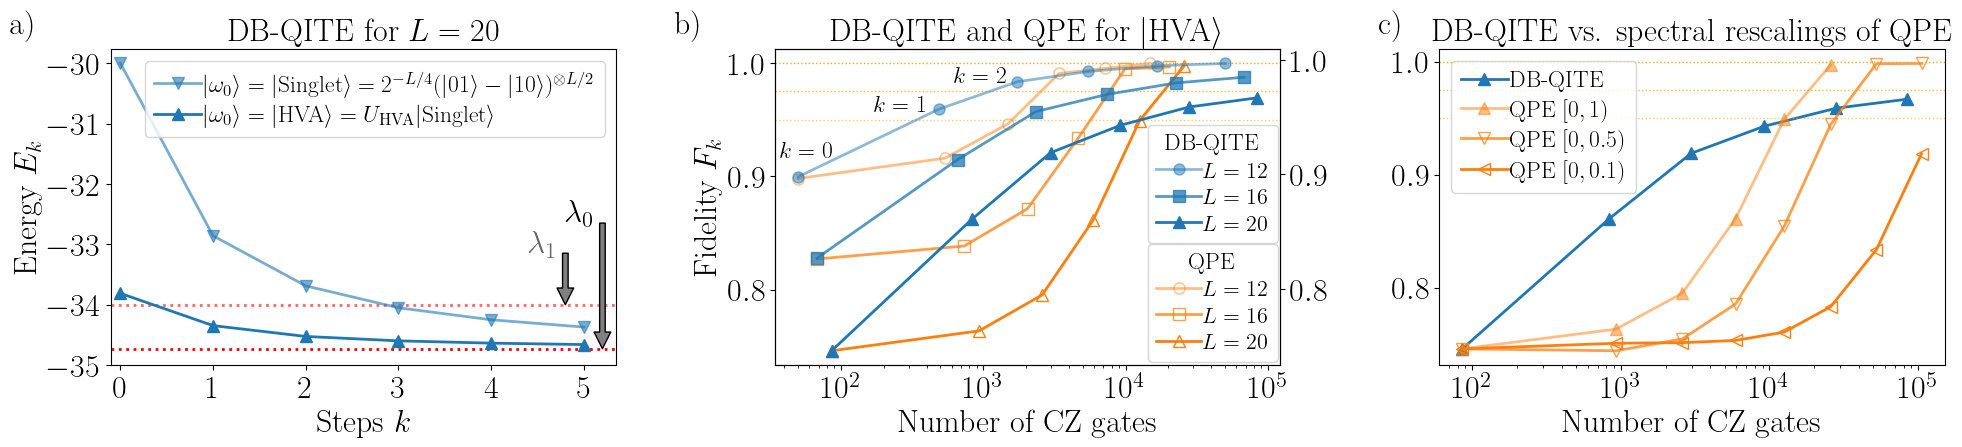

In [ ]:
run_param_rc(23)

index = 1 # 0 Singlet, 1 VQE
markers = ['o', 's', '^', 'v', '<', '>', 'd']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ((axE_QITE, axF_QITE, axF_QPE)) = plt.subplots(1, 3, figsize=(20, 5))#, gridspec_kw={"width_ratios": [4,2,10,1]})

###############################################################################
# SUBPLOT 1: Energy and fidelity QITE
###############################################################################

generate_plot_E_DBQITE(axE_QITE,20)
axE_QITE.annotate('a)', xy = (-.2, 1.05), xycoords='axes fraction')
axE_QITE.annotate(' ',
            xy=(5.2, E0_val[20]),  # theta, radius
            xytext=(5.2, -32.6),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='gray', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')
axE_QITE.annotate(' ',
            xy=(4.8, -34),  # theta, radius
            xytext=(4.8, -33.1),    # fraction, fraction
            textcoords='data',
            arrowprops=dict(facecolor='gray', shrink=0.001),
            horizontalalignment='left',
            verticalalignment='bottom')
axE_QITE.set_xlim([-0.1,5.35])
axE_QITE.text(
    4.4,           
    -33,       
    r"$\lambda_1$",                          
    va="center",
    ha="left",
    color="black",
    alpha = 0.6
)   

axE_QITE.text(
    4.8,           
    -32.5  ,           
    r"$\lambda_0$",                           
    va="center",
    ha="left",
    color="black"
    )
###############################################################################
# SUBPLOT 2: Fidelity and CZ count QITE
###############################################################################

#generate_fidelity_cz_qite(axF_QITE, "VQE")
ax = axF_QITE
init_type="VQE"

if init_type=="Singlet":
    index = 0
    ax.set_title(r"DB-QITE for $|$Singlet$\rangle$")
if init_type=="VQE":
    index = 1
    ax.set_title(r"DB-QITE for $|$HVA$\rangle$")

steps = list(range(0,6))

cz_data_qite = dict()

for i,L in enumerate(list(range(10,22,2))):
    results = results_QITE[L]
    cz = np.array([results[index]["circuit_data"][0][k]['cz'] for k in steps])
    cz_data_qite[L] = cz

alphas =[0.5,0.75,1,0.7]
cz_count_HVA = {}
fidelities_HVA = {}
ax2 = ax.twinx()
for i,L in enumerate([12,16,20]):
    results = results_QITE[L]

    psi = E0_vec[L] # ground state
    states = results[index]["statevectors"]
    fidelities = []
    for phi in states:
        fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

    cz_counts = cz_data_qite[L]
    cz_count_HVA[L] = cz_data_qite[L][0]
    fidelities_HVA[L] = fidelities[0]
    ax2.plot(cz_counts, fidelities, marker=markers[i], zorder = 4+i, label=f'$L={L}$',color= colors[0], alpha = alphas[i])




ax.legend(loc="best", ncols=2, fontsize=15)
#ax.set_xticks(ticks = range(0, 6, 1))
ax.set_xscale('log')
ax.set_xlabel(r"Number of CZ gates")
ax.set_ylabel(r"Fidelity $F_k$")



ax.set_title(r"DB-QITE and QPE for $|$HVA$\rangle$")

steps = list(range(1,6))

cz_data_qpe = dict()
for i,L in enumerate([12,16,20]):
    cz = [results_QPE[index][L][k]['ops']['cz'] for k in steps]
    cz.insert(0, cz_count_HVA[L])
    cz_data_qpe[L] = cz


for i,L in enumerate([12,16,20]):
    fidelities = [results_QPE[index][L][k]['F0'] for k in steps]
    fidelities.insert(0, fidelities_HVA[L])
    cz_counts = cz_data_qpe[L]
    #adding the initialization data
    ax.plot(cz_counts, fidelities, marker=markers[i], label=f'$L={L}$', zorder = i, color= colors[1], alpha = alphas[i], markerfacecolor='none')
if init_type=="VQE":
    steps = list(range(1,8))


ax.axhline(y=1, color="orange", linestyle=':', alpha=1.0,linewidth = 1)
ax.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8,linewidth = 1)
ax.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6,linewidth = 1)
ax.legend(loc="best", ncols=1, fontsize=16, title='QPE',title_fontsize='17', bbox_to_anchor=(0.715, 0.42))
ax2.legend(loc="best", ncols=1, fontsize=16, title='DB-QITE',title_fontsize='17', bbox_to_anchor=(0.715, 0.795))

ax.set_xscale('log')
#ax.set_xticks(ticks = range(1, 6, 1))
ax.set_xlabel(r"Number of CZ gates")   
ax.set_ylabel(r"Fidelity $F_k$")
    


axF_QITE.annotate('b)', xy = (-.2, 1.05), xycoords='axes fraction')



#axF_QITE.annotate(r'DB-QITE', xy=(1e4,0.98), textcoords='data', fontsize=15,rotation=90)
#axF_QITE.annotate(r'QPE', xy=(1e4,0.75), textcoords='data', fontsize=15,rotation=90)
###############################################################################
# SUBPLOT 3: Fidelity and CZ count QPE
###############################################################################

#generate_fidelity_cz_qpe(axF_QPE, "VQE", show_legend=False)


L=20
index =1


results = results_QITE[L]

psi = E0_vec[L] # ground state
states = results[index]["statevectors"]
fidelities = []
for phi in states:
    fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

cz_counts = cz_data_qite[L]
axF_QPE.plot(cz_counts, fidelities, marker=markers[2], label=f'DB-QITE',color= colors[0], alpha = alphas[i])

steps = list(range(1,6))
fidelities = [results_QPE[index][L][k]['F0'] for k in steps]
fidelities.insert(0, fidelities_HVA[L])
cz_counts = cz_data_qpe[L]
axF_QPE.plot(cz_counts, fidelities, marker=markers[2], label=f'QPE $[0,1)$', color= colors[1], alpha = 0.5)

steps = list(range(1,8))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fidelities = [results_QPE_rescaled_05[index][20][k]['F0'] for k in steps]
fidelities.insert(0, fidelities_HVA[L])
cz_counts = [results_QPE_rescaled_05[index][20][k]['ops']['cz'] for k in steps]
cz_counts.insert(0, cz_count_HVA[L])
axF_QPE.plot(cz_counts, fidelities, color=colors[1], label=f'QPE $[0,0.5)$'
             , marker=markers[3], markerfacecolor='none', alpha = 0.75)


fidelities = [results_QPE_rescaled_01[index][20][k]['F0'] for k in steps]
fidelities.insert(0, fidelities_HVA[L])
cz_counts = [results_QPE_rescaled_01[index][20][k]['ops']['cz'] for k in steps]
cz_counts.insert(0, cz_count_HVA[L])

axF_QPE.plot(cz_counts, fidelities, color=colors[1], label=f'QPE $[0,0.1)$'
             , marker=markers[4], markerfacecolor='none',alpha = 1)

axF_QPE.axhline(y=1, color="orange", linestyle=':', alpha=1.0,linewidth = 1)
axF_QPE.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8,linewidth = 1)
axF_QPE.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6,linewidth = 1)

axF_QPE.annotate('c)', xy = (-.12, 1.05), xycoords='axes fraction')
axF_QITE.annotate(r'$k=0$', xy=(37,0.917), textcoords='data', fontsize=17,zorder = 11)
axF_QITE.annotate(r'$k=1$', xy=(170,0.957), textcoords='data', fontsize=17,zorder = 12)
axF_QITE.annotate(r'$k=2$', xy=(625,0.983), textcoords='data', fontsize=17,zorder = 13)
#axF_QPE.annotate(r'$L=20,$', xy=(16100,0.87), textcoords='data', fontsize=15)
#axF_QPE.annotate(r'$[0,0.5)$', xy=(16100,0.85), textcoords='data', fontsize=15)
#axF_QPE.annotate(r'$L=20,$', xy=(39000,0.795), textcoords='data', fontsize=15)
#axF_QPE.annotate(r'$[0,0.1)$', xy=(39000,0.7753), textcoords='data', fontsize=15)
axF_QPE.set_xscale('log')
axF_QPE.set_xlabel(r"Number of CZ gates")  
axF_QPE.set_title(r"DB-QITE vs. spectral rescalings of QPE")
axF_QPE.legend(loc="upper left", ncols=1, fontsize=17)#,title=f'$L=20$',title_fontsize='15')
plt.tight_layout()
#plt.savefig("plots/QITE_Heisenberg_main.pdf")


## QTML abstract figure

/var/folders/1z/61mvq94131s6zhfjfhwzpfwr0000gn/T/ipykernel_16619/2891864123.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best", ncols=2, fontsize=15)


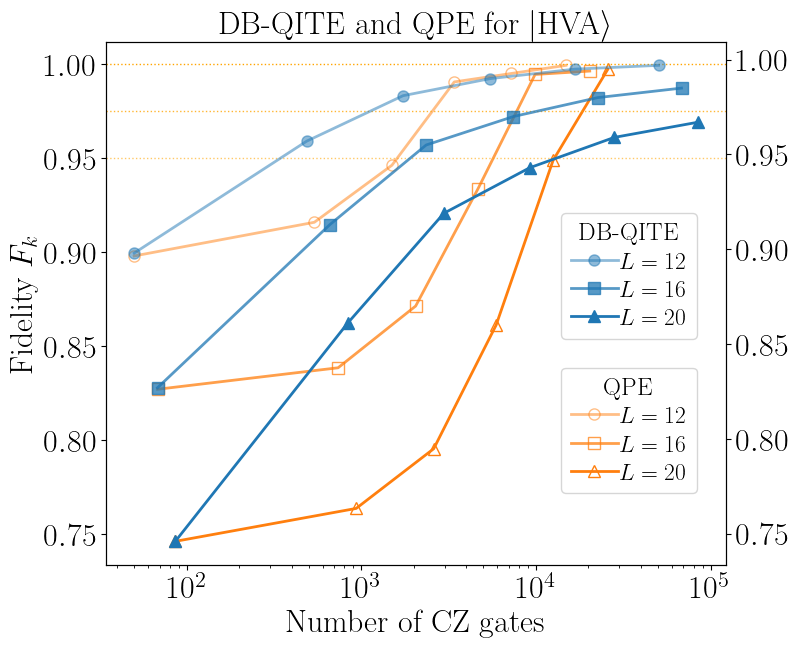

In [22]:
run_param_rc(23)

index = 1 # 0 Singlet, 1 VQE
markers = ['o', 's', '^', 'v', '<', '>', 'd']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ((axF_QITE)) = plt.subplots(1, 1, figsize=(8, 6.8))#, gridspec_kw={"width_ratios": [4,2,10,1]})

###############################################################################
# SUBPLOT 2: Fidelity and CZ count QITE
###############################################################################

#generate_fidelity_cz_qite(axF_QITE, "VQE")
ax = axF_QITE
init_type="VQE"

if init_type=="Singlet":
    index = 0
    ax.set_title(r"DB-QITE for $|$Singlet$\rangle$")
if init_type=="VQE":
    index = 1
    ax.set_title(r"DB-QITE for $|$HVA$\rangle$")

steps = list(range(0,6))

cz_data_qite = dict()

for i,L in enumerate(list(range(10,22,2))):
    results = results_QITE[L]
    cz = np.array([results[index]["circuit_data"][0][k]['cz'] for k in steps])
    cz_data_qite[L] = cz

alphas =[0.5,0.75,1,0.7]
cz_count_HVA = {}
fidelities_HVA = {}
ax2 = ax.twinx()
for i,L in enumerate([12,16,20]):
    results = results_QITE[L]

    psi = E0_vec[L] # ground state
    states = results[index]["statevectors"]
    fidelities = []
    for phi in states:
        fidelities.append(np.round(np.abs(np.dot(psi.conj().transpose(),phi))**2,3))

    cz_counts = cz_data_qite[L]
    cz_count_HVA[L] = cz_data_qite[L][0]
    fidelities_HVA[L] = fidelities[0]
    ax2.plot(cz_counts, fidelities, marker=markers[i], zorder = 4+i, label=f'$L={L}$',color= colors[0], alpha = alphas[i])




ax.legend(loc="best", ncols=2, fontsize=15)
#ax.set_xticks(ticks = range(0, 6, 1))
ax.set_xscale('log')
ax.set_xlabel(r"Number of CZ gates")
ax.set_ylabel(r"Fidelity $F_k$")



ax.set_title(r"DB-QITE and QPE for $|$HVA$\rangle$")

steps = list(range(1,6))

cz_data_qpe = dict()
for i,L in enumerate([12,16,20]):
    cz = [results_QPE[index][L][k]['ops']['cz'] for k in steps]
    cz.insert(0, cz_count_HVA[L])
    cz_data_qpe[L] = cz


for i,L in enumerate([12,16,20]):
    fidelities = [results_QPE[index][L][k]['F0'] for k in steps]
    fidelities.insert(0, fidelities_HVA[L])
    cz_counts = cz_data_qpe[L]
    #adding the initialization data
    ax.plot(cz_counts, fidelities, marker=markers[i], label=f'$L={L}$', zorder = i, color= colors[1], alpha = alphas[i], markerfacecolor='none')
if init_type=="VQE":
    steps = list(range(1,8))


ax.axhline(y=1, color="orange", linestyle=':', alpha=1.0,linewidth = 1)
ax.axhline(y=0.975, color="orange", linestyle=':', alpha=0.8,linewidth = 1)
ax.axhline(y=0.95, color="orange", linestyle=':', alpha=0.6,linewidth = 1)
ax.legend(loc="best", ncols=1, fontsize=17, title='QPE',title_fontsize='18', bbox_to_anchor=(0.715, 0.4))
ax2.legend(loc="best", ncols=1, fontsize=17, title='DB-QITE',title_fontsize='18', bbox_to_anchor=(0.715, 0.695))

ax.set_xscale('log')
#ax.set_xticks(ticks = range(1, 6, 1))
ax.set_xlabel(r"Number of CZ gates")   
ax.set_ylabel(r"Fidelity $F_k$")
    


#axF_QITE.annotate('a)', xy = (-.2, 1.05), xycoords='axes fraction')


plt.savefig("plots/QTML.pdf")
